In [1]:
import netCDF4
import os

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline

import time
import progressbar as pbar

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [5]:

os.chdir('/home/rakesh/Desktop/Particle_tracing')
f = netCDF4.Dataset('NestedFieldParticle_thin_noZon.nc', 'r')
time = f.variables['time'][:]
lats = f.variables['lat'][:]
lons = f.variables['lon'][:]
traj = f.variables['trajectory'][:] # in format [paticle number, locations with time]
f.close()

print(lons.shape)

(25068, 451)


100% (426 of 426) |######################| Elapsed Time: 3:01:59 Time:  3:01:59


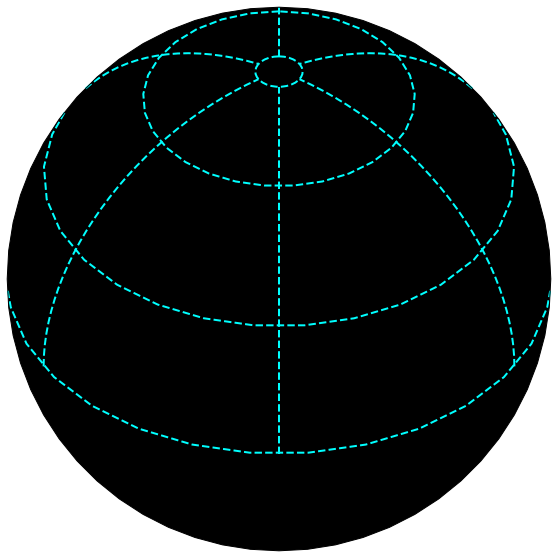

In [9]:
##### PLOT THE ENTIRE GLOBE #######

if True: # allows skipping this cell

    alpha=0.5 # translucency of the particle path lines

    fig = plt.figure(figsize=(10, 10))

    # create the projections
    ortho = ccrs.Orthographic(central_latitude=40, central_longitude=0)
    geo = ccrs.Geodetic()

    # create the figure object
    ax = plt.axes(projection=ortho)
    ax.set_global() # show entire globe
    
    # customize the grid lines
    gl = ax.gridlines(linewidth=2, color='cyan', alpha=1, linestyle='--')
    gl.xlocator = mticker.FixedLocator([-180,-120, -60, 0, 60, 120, 180])
    gl.ylocator = mticker.FixedLocator([0, 30, 60, 85])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER 
    
    # set the globe color to black
    ax.background_patch.set_facecolor('k')

    # number of path points plotted simultaneously for a particle
    num_pplot_points = 25
    
    for i in pbar.progressbar(range(num_pplot_points, lats.shape[1])):    
    #for i in pbar.progressbar(range(num_pplot_points, num_pplot_points+2)):    
        lats2 = []; lons2 = []
        
        # added all the requested path points into a list
        for j in range(num_pplot_points):
            lats2.append(lats[:,i-j])
            lons2.append(lons[:,i-j])
        
        im=ax.plot(lons2, lats2, '-', c='y', transform=geo, alpha=alpha, linewidth=1) 
        filename = 'frames/img{:03d}.png'.format(i)
        fig.savefig(filename, dpi=250, facecolor='k')
        
        ax.lines = [] # reset the plot for replotting
        
        #print('{} frame done'.format(i))



In [4]:
##### PLOT A SECTION OF THE GLOBE #######

if True: # allows skipping this cell

    alpha=0.5 # translucency of the particle path lines
    
    fig = plt.figure(figsize=(10, 10))
    
    # create the projections
    central_lon, central_lat = 270, 45 # viewpoint of the projection
    ortho = ccrs.Orthographic(central_lon, central_lat)
    geo = ccrs.Geodetic()
    
    # create the figure object
    ax = plt.axes(projection=ortho)
    
    # Define the section that needs to be viewed
    # Give as -> [lon_left, lon_right, lat_bot, lat_top]
    #extent = [-40, 20, 40, 100]
    extent = [240, 310, 20, 60] 
    
    # set the view projection
    ax.set_extent(extent)

    # customize the grid lines
    gl = ax.gridlines(linewidth=2, color='cyan', alpha=1, linestyle='--')
    gl.xlocator = mticker.FixedLocator([-180,-120, -60, 0, 60, 120, 180])
    gl.ylocator = mticker.FixedLocator([0, 30, 60, 85])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER  
    
    # set the globe color to black
    ax.background_patch.set_facecolor('k')
    
    # number of path points plotted simultaneously for a particle
    num_pplot_points = 15
    
    for i in pbar.progressbar(range(num_pplot_points, lats.shape[1])):    
    #for i in np.arange(0, 6):    
        lats2 = []; lons2 = []
        
        # added all the requested path points into a list
        for j in range(num_pplot_points):
            lats2.append(lats[:,i-j])
            lons2.append(lons[:,i-j])
            
        im=ax.plot(lons2, lats2, '-', c='y', transform=geo, alpha=alpha, linewidth=1) 
        filename = 'frames/img{:03d}.png'.format(i)
        fig.savefig(filename, dpi=150, facecolor='k' )
        
        ax.lines = [] # reset the plot for replotting
        #print('{} frame done'.format(i))

